# API assigment
Group: Faluke and Hannah

# 1. Data info


We got data about uNoGS (unofficial Netflix online Global Search) which allows anyone to easily search the global Netflix catalog since the official API for Netflix is not available.
Link to the page [link text](https://rapidapi.com/unogs/api/unogs/details)

This API will allow you to pull all Netflix title information for every title in all the Countries Netflix operates in.
Highlights:
- Look up specific details for every country
- List and Search titles that have been Deleted
- Get specific Netflix,IMDB,Country,Season and Episode detail on titles based on Netflix or IMDB ID
- Search across entire global Netflix catalog

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO

We get the list of latest released movies worldwide in Netflix in the last 30 days (from 4th of June 2020 till 4th of July 2020). 

In [ ]:
#url = "https://unogs-unogs-v1.p.rapidapi.com/aaapi.cgi"

#querystring = {"q":"get:new30","p":"1","t":"ns","st":"adv"}

#headers = {
#    'x-rapidapi-host': "unogs-unogs-v1.p.rapidapi.com",
#    'x-rapidapi-key': "..."
#    }

#response = requests.get(url, headers=headers, params=querystring)

#content = json.loads(response.text)
#content = pd.DataFrame(content)
#content.to_csv('~/Desktop/worldlast30p1.csv')

From here we will work with our csv files downloaded from the unogs API. There are 4 csv files which cover 350 items in the list since each API request returned a page of 100 items only.

After get the json data, we constructed dataframes as follows, where $i=1,2,3,4$

In [ ]:
#for i in range(0,len(worldlast30pi)):
#    if i==0:
#        dfi=pd.DataFrame([json.loads(json.loads(worldlast30pi['ITEMS'].to_json(orient='values'))[i]\
#                                       .replace("\'", "\""))])
#    else:
#        dfi=pd.concat([df, pd.DataFrame([json.loads(json.loads(worldlast30pi['ITEMS']\
#              .to_json(orient='values'))[i].replace("\'", "\""))])], ignore_index=True)

# 2. Data structure

In [ ]:
from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()

Saving df1.csv to df1.csv


Saving df2.csv to df2.csv


Saving df3.csv to df3.csv


Saving df4.csv to df4.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded1['df1.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded2['df2.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded3['df3.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded4['df4.csv']))

In [ ]:
df=pd.concat([df1,df2,df3,df4],ignore_index=True)
df.head()

,Unnamed: 0,netflixid,title,image,synopsis,rating,type,released,runtime,largeimage,unogsdate,imdbid,download
0,0,81059942,JU-ON: Origins,https://occ-0-138-41.1.nflxso.net/dnm/api/v6/e...,A paranormal researcher searches obsessively f...,NaN,series,2020,NaN,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,2020-07-03,NaN,0
1,1,80217768,November Criminals,https://occ-0-2218-2219.1.nflxso.net/dnm/api/v...,"Dissatisfied with the police&rsquo;s progress,...",NaN,movie,2017,1h25m,https://occ-0-2218-2219.1.nflxso.net/dnm/api/v...,2020-07-03,NaN,0
2,2,81060576,Southern Survival,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,The BattlBox crew tests out products designed ...,NaN,series,2020,NaN,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...,2020-07-03,NaN,0
3,3,80238203,Desperados,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,"After drunkenly sending a cringeworthy email, ...",NaN,movie,2020,1h46m,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...,2020-07-03,NaN,0
4,4,81005407,The Baby-Sitters Club,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,Ann M. Martin&#39;s beloved books get a modern...,NaN,series,2020,NaN,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...,2020-07-03,NaN,0


# 3. Cleaning data

## 1) Dropping unnecessary columns

### Observation: The following columns only have unique (or a few) values, and can be dropped.

In [ ]:
print(df['rating'].unique())
print(df['unogsdate'].unique())
print(df['imdbid'].unique())
print(df['download'].unique())

[nan]
['2020-07-03' '2020-07-02' '2020-07-01' '2020-06-30' '2020-06-29'
 '2020-06-28' '2020-06-27' '2020-06-18' '2020-06-11' '2020-06-04']
[nan]
[0]


In [ ]:
df_clean=df.drop(['Unnamed: 0','rating','imdbid','download','unogsdate'],axis=1)
df_clean.head()

,netflixid,title,image,synopsis,type,released,runtime,largeimage
0,81059942,JU-ON: Origins,https://occ-0-138-41.1.nflxso.net/dnm/api/v6/e...,A paranormal researcher searches obsessively f...,series,2020,NaN,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...
1,80217768,November Criminals,https://occ-0-2218-2219.1.nflxso.net/dnm/api/v...,"Dissatisfied with the police&rsquo;s progress,...",movie,2017,1h25m,https://occ-0-2218-2219.1.nflxso.net/dnm/api/v...
2,81060576,Southern Survival,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,The BattlBox crew tests out products designed ...,series,2020,NaN,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...
3,80238203,Desperados,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,"After drunkenly sending a cringeworthy email, ...",movie,2020,1h46m,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...
4,81005407,The Baby-Sitters Club,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,Ann M. Martin&#39;s beloved books get a modern...,series,2020,NaN,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...


## 2) Checking missing values

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   netflixid   404 non-null    int64 
 1   title       404 non-null    object
 2   image       404 non-null    object
 3   synopsis    404 non-null    object
 4   type        404 non-null    object
 5   released    404 non-null    int64 
 6   runtime     283 non-null    object
 7   largeimage  404 non-null    object
dtypes: int64(2), object(6)
memory usage: 25.4+ KB


### Conclusion: The missing values are only in the 'runtime' column. The runtime for series is labeled as NaN.

## 3) Checking duplicate values

In [ ]:
df_clean['netflixid'].value_counts()

81269683    5
81028222    4
81251947    4
80036982    4
80238203    4
           ..
81285512    4
81270678    4
81281872    1
81256683    1
81081050    1
Name: netflixid, Length: 103, dtype: int64

In [ ]:
df_clean['title'].value_counts()

Ultraman Z                           5
The World of the Married             4
Unsolved Mysteries                   4
November Criminals                   4
The Baby-Sitters Club                4
                                    ..
Ride Like a Girl                     4
Under the Riccione Sun               4
A Whisker Away                       1
It Chapter Two                       1
Saga of Tanya the Evil: The Movie    1
Name: title, Length: 103, dtype: int64

In [ ]:
df_clean[df_clean['title']=='Ultraman Z']

,netflixid,title,image,synopsis,type,released,runtime,largeimage
99,81269683,Ultraman Z,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...,"Pursuing an evil threat, Ultraman Z comes to E...",series,2020,NaN,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...
100,81269683,Ultraman Z,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...,"Pursuing an evil threat, Ultraman Z comes to E...",series,2020,NaN,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...
200,81269683,Ultraman Z,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...,"Pursuing an evil threat, Ultraman Z comes to E...",series,2020,NaN,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...
301,81269683,Ultraman Z,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...,"Pursuing an evil threat, Ultraman Z comes to E...",series,2020,NaN,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...
402,81269683,Ultraman Z,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...,"Pursuing an evil threat, Ultraman Z comes to E...",series,2020,NaN,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...


In [ ]:
df_clean.drop_duplicates(inplace=True)
df_clean=df_clean.reindex()

In [ ]:
df_clean.head()

,netflixid,title,image,synopsis,type,released,runtime,largeimage
0,81059942,JU-ON: Origins,https://occ-0-138-41.1.nflxso.net/dnm/api/v6/e...,A paranormal researcher searches obsessively f...,series,2020,NaN,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...
1,80217768,November Criminals,https://occ-0-2218-2219.1.nflxso.net/dnm/api/v...,"Dissatisfied with the police&rsquo;s progress,...",movie,2017,1h25m,https://occ-0-2218-2219.1.nflxso.net/dnm/api/v...
2,81060576,Southern Survival,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,The BattlBox crew tests out products designed ...,series,2020,NaN,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...
3,80238203,Desperados,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,"After drunkenly sending a cringeworthy email, ...",movie,2020,1h46m,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...
4,81005407,The Baby-Sitters Club,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,Ann M. Martin&#39;s beloved books get a modern...,series,2020,NaN,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...


# 4. Data analysis and visualization

In [ ]:
%matplotlib inline
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px


# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import plotly.graph_objs as go
#import chart_studio.plotly as py

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# 4.1 Distribution of the released year:

In [ ]:
released_year = df_clean.released.value_counts()
released_year

2017    21
2020    20
2019    17
2018    13
2014     4
2011     4
1996     3
2015     2
2016     2
2008     2
2004     2
1998     2
2012     2
1971     1
1994     1
1974     1
1991     1
2009     1
1999     1
2010     1
2013     1
0        1
Name: released, dtype: int64

In [ ]:
print(df_clean[df_clean['released']==0])

    netflixid  ...                                         largeimage
58   81094637  ...  https://occ-0-2579-1432.1.nflxso.net/dnm/api/v...

[1 rows x 8 columns]


There is a video with released year as 0. We google by the name of the video and the Netflix ID and found out that it is a movie with the released year 2018. Thus, we replace the value of this cell as 2018 as follow

In [ ]:
df_clean.released[df_clean.released==0] = 2018
released_year = df_clean.released.value_counts()
released_year

2017    21
2020    20
2019    17
2018    14
2014     4
2011     4
1996     3
2016     2
2015     2
2012     2
2008     2
2004     2
1998     2
1974     1
1991     1
1994     1
2010     1
1999     1
2009     1
2013     1
1971     1
Name: released, dtype: int64

In [ ]:
years = released_year.index
fig = go.Figure(data = [go.Pie(labels = years, values = released_year)])
fig.show(renderer="colab")

Observations:
- The oldest movie is from 1971.
- More than 3/4 of the new released videos are within 2017-2020. In which, 19.4% are videos in 2020, quite a decent amount of new videos in a streaming channel per 30 days.


# 4.2 Distribution of runtime:

In [ ]:
df_clean.runtime.value_counts()

1h37m    4
1h38m    4
1h46m    3
1h40m    3
1h25m    3
1h26m    3
1h58m    3
1h35m    3
1h29m    3
1h52m    2
1h28m    2
1h27m    2
1h34m    2
1h30m    2
1h44m    2
1h48m    2
1h42m    2
1h45m    2
1h33m    2
1h31m    1
2h0m     1
2h10m    1
1h10m    1
1h39m    1
2h27m    1
1h21m    1
1h22m    1
1h36m    1
51m      1
1h53m    1
2h50m    1
2h1m     1
1h11m    1
1h43m    1
1h16m    1
1h15m    1
2h49m    1
1h47m    1
1h49m    1
1h18m    1
1h59m    1
1h55m    1
2h9m     1
Name: runtime, dtype: int64

The runtime is only available in the movie type. This we only calculate runtime distribution for the type 'movie'

Convert runtime into minutes

In [ ]:
movie = df_clean[df_clean['type'] =='movie']
movie['runtime'] = movie['runtime'].str.replace('h','*60+').str.replace('m','*1').apply(eval)
movie['runtime'].value_counts().sort_index()

51     1
70     1
71     1
75     1
76     1
78     1
81     1
82     1
85     3
86     3
87     2
88     2
89     3
90     2
91     1
93     2
94     2
95     3
96     1
97     4
98     4
99     1
100    3
102    2
103    1
104    2
105    2
106    3
107    1
108    2
109    1
112    2
113    1
115    1
118    3
119    1
120    1
121    1
129    1
130    1
147    1
169    1
170    1
Name: runtime, dtype: int64

In [ ]:
movie.runtime.mean()

100.06849315068493

In [ ]:
x = np.random.randn(103)
fig = go.Figure(data = [go.Histogram(x = movie['runtime'])])
fig.show(renderer="colab")

The mean runtime is approximately 100 minutes.\
The most popular runtime is from 90 to 100 minutes. The vast majority of the movies are from 80 to 120 minnutes.\
There are only 3 movies with exceptional length : 1 is under 60 minutes and 2 are from 160 to 180 minutes.

# 4.3 Synopsis analysis

In [ ]:
df_clean['words'] = df_clean['synopsis'].str.split().apply(len)
# Count the number of words in the synopsis and assign it to the new column 'words'

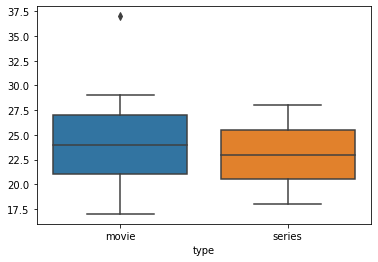

In [ ]:
sns.boxplot(data=df_box)

There one video with exceptional long synopsis (37 words)

In [ ]:
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 2.6MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px
fig = px.sunburst(df_clean, path=['type', 'released'], values='words')
fig.show(renderer ='colab')

Sentiment text analysis:
Sentiment analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

Subjective analysis is where the feeling of the individual taking part in the analysis process determines the outcome. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

Library used: textblob

In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob
senti_polarity = []
for row in df_clean['synopsis']:
    polarity = TextBlob(row)
    i = polarity.sentiment
    senti_polarity.append(i)
senti_polarity= pd.DataFrame(senti_polarity)


df_clean = pd.concat([df_clean, senti_polarity], axis=1, sort=False)
df_clean['polarity']=df_clean['polarity'].apply(lambda x:round(x,2))
df_clean['subjectivity']=df_clean['subjectivity'].apply(lambda x:round(x,2))

neutral_e = df_clean.polarity[df_clean['polarity'] == 0].count()
positive_e = df_clean.polarity[df_clean['polarity'] > 0].count()
negative_e = df_clean.polarity[df_clean['polarity'] < 0].count()

print('Neutral emotion in synopsis :', neutral_e)
print('Positive emotion in synopsis :', positive_e)
print('Negative emotion in synopsis :', negative_e)

Neutral emotion in synopsis : 19
Positive emotion in synopsis : 56
Negative emotion in synopsis : 28


In [ ]:
df_clean['sentiment'] = 'neutral'
df_clean.loc[(df_clean['polarity']>0), 'sentiment'] = 'positive'
df_clean.loc[(df_clean['polarity']<0), 'sentiment'] = 'negative'

More than half of the synopisi are positive emotion while more than a quarter regards to negative emotion

In [ ]:
subjective_s = df_clean.subjectivity[df_clean['subjectivity'] ==1].count()
non_subjective_s = df_clean.subjectivity[df_clean['subjectivity'] == 0].count()

print('There are ',subjective_s, ' subjective statements in the synopsis')
print('There are ', non_subjective_s, ' non-subjective statements in the synopsis')

There are  5  subjective statements in the synopsis
There are  11  non-subjective statements in the synopsis


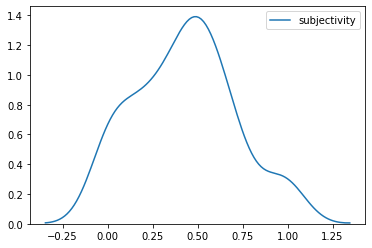

In [ ]:
sns.kdeplot(df_clean['subjectivity'])

### Conclusion: Most of the subjectivity statement has a value around 0.5.

# 4.4 Word cloud for synopsis

In [ ]:
df_syn_1=df_clean[df_clean['type']=='series']['synopsis']
df_syn_2=df_clean[df_clean['type']=='movie']['synopsis']

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Series')

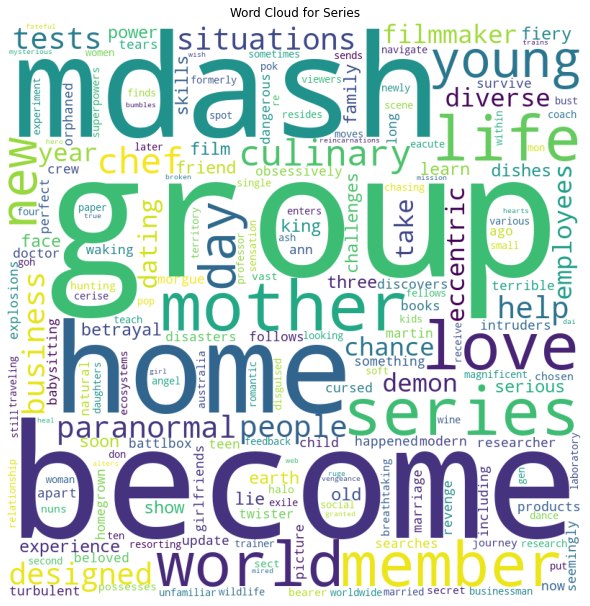

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_syn_1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for Series")
  
plt.show() 

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Movies')

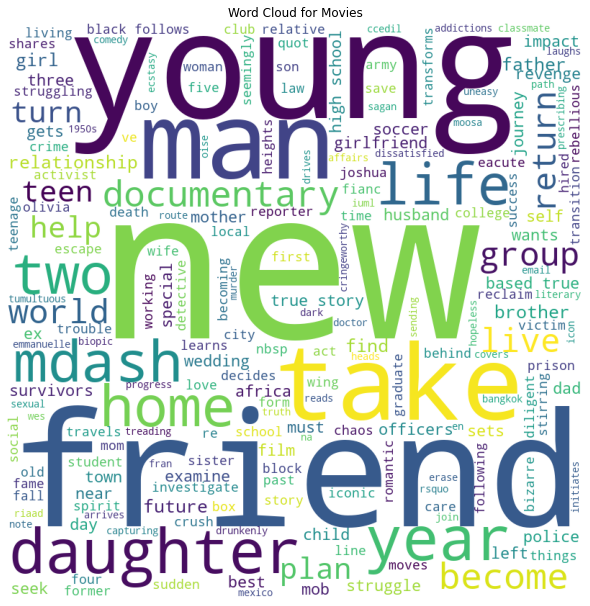

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_syn_2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for Movies")
  
plt.show() 

# 4.5 Summary

Enter the Netflix ID or movie/series name: 81273834
Netflix ID: 81273834
600 Bottles of Wine, series, 2017
Synopsis: A newly single woman re-enters the dating scene, resorting to friends &mdash; and sometimes, wine &mdash; to help her navigate unfamiliar relationship territory.


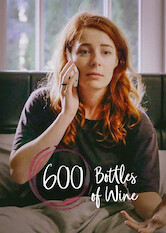

In [ ]:
def my_fun(value):
    #print(value)
    if (isinstance(value, str)==True) and (value.isnumeric()==False):
        df_temp=df_clean[df_clean['title']==value]
        response = requests.get(df_temp['image'].iloc[0])
        img = Image.open(BytesIO(response.content))
        print('Netflix ID'+': '+str(df_temp['netflixid'].iloc[0]))
        print(df_temp['title'].iloc[0]+', '+df_temp['type'].iloc[0]+', '+str(df_temp['released'].iloc[0]))
        print('Synopsis'+': '+df_temp['synopsis'].iloc[0])
        return img
    if (isinstance(value, str)==True) and (value.isnumeric()==True):
        df_temp=df_clean[df_clean['netflixid']==int(value)]
        response = requests.get(df_temp['image'].iloc[0])
        img = Image.open(BytesIO(response.content))
        print('Netflix ID'+': '+str(df_temp['netflixid'].iloc[0]))
        print(df_temp['title'].iloc[0]+', '+df_temp['type'].iloc[0]+', '+str(df_temp['released'].iloc[0]))
        print('Synopsis'+': '+df_temp['synopsis'].iloc[0])
        return img
my_fun(input('Enter the Netflix ID or movie/series name: '))

In [ ]:
df_clean['netflixid'].unique()

array([81059942, 80217768, 81060576, 80238203, 81005407, 81290759,
       60031766, 81287884, 81262161, 81251947, 81281633, 81243687,
         953816, 70107862, 19828786, 81289302, 81289299, 81289297,
       81194682, 81287006, 81284368, 70138804, 80242724, 81278407,
       81284367, 81011717, 81273905, 81273840, 81273834, 81052581,
       81278445, 70019000,   705457, 81289166, 81044408, 81086605,
       80102060, 81279763, 80156709, 81280470, 81282009, 81284370,
       81275355, 81283760, 81277581, 81271934, 81271003, 81277545,
       81277543, 81168350, 81277544, 81277538, 81168352, 81278715,
       80017304, 70189875, 81277537, 81277539, 81094637, 81277542,
       81277540,   757706, 81297953, 81284515, 81246987, 81246932,
       81226082, 80059044, 81221858, 70243011,  1023800, 81231351,
       81214083, 81270678, 81176235, 70021434, 80074781, 81026055,
       81014405, 81235103, 80036982, 81264660, 80177736, 81244343,
       81285512, 80993647, 81275397, 81275396, 80988833, 81264